# Fake News Classifier using NLP

Fake news, or misinformation, is a growing concern in today's society as it can have a significant impact on public opinion and decision-making. To combat this problem, researchers have turned to natural language processing (NLP) techniques to automatically classify fake news. NLP methods can be used to analyze the text of news articles and detect patterns or features that are indicative of fake news. We will be using these [datasets](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) from Kaggle to classify news articles using machine learning algorithms. Our job is to create a model which predicts whether a given news is real or fake. There are two datasets, one containing real and the other containing fake news.  

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a method used to investigate and comprehend data, with the objective of identifying patterns, connections, and trends. The initial step in our analysis would be to import and merge the necessary datasets. We will then evaluate the combined data to recognize the columns that are essential for our analysis. It is crucial to check the data balance and detect any missing values during this phase.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
real = pd.read_csv("Real.csv")
fake = pd.read_csv("Fake.csv")

Let us look at the structure of the two datasets

In [3]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


As we are classifying fake news using a supervised learning method, we create a target column called `label` in both real and fake news data and then concatenate them. To a `real` news, we give the label 0 and to a `fake` news we give 1.  

In [5]:
real['label'] = 0
fake['label'] = 1
data = pd.concat([real, fake])

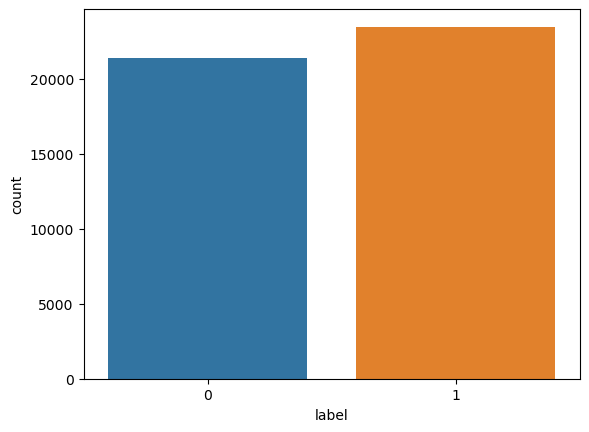

In [6]:
import seaborn as sns
sns.countplot(x='label', data=data)
plt.show()

As the plot demonstrates, the data is evenly distributed. Additionally, the absence of null values can also be inferred from the following:

In [7]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

The dataset contains 5 columns, namely `title`, `text`, `subject`, `date`, and `label`. In order to construct a machine learning model, the `date` and `subject` columns are not necessary. The `title` and `text` columns will serve as the features and the `label` column will be the target variable. The reason for excluding the `date` column is clear, however, let's delve further into why the `subject` column should be disregarded when training the model. 

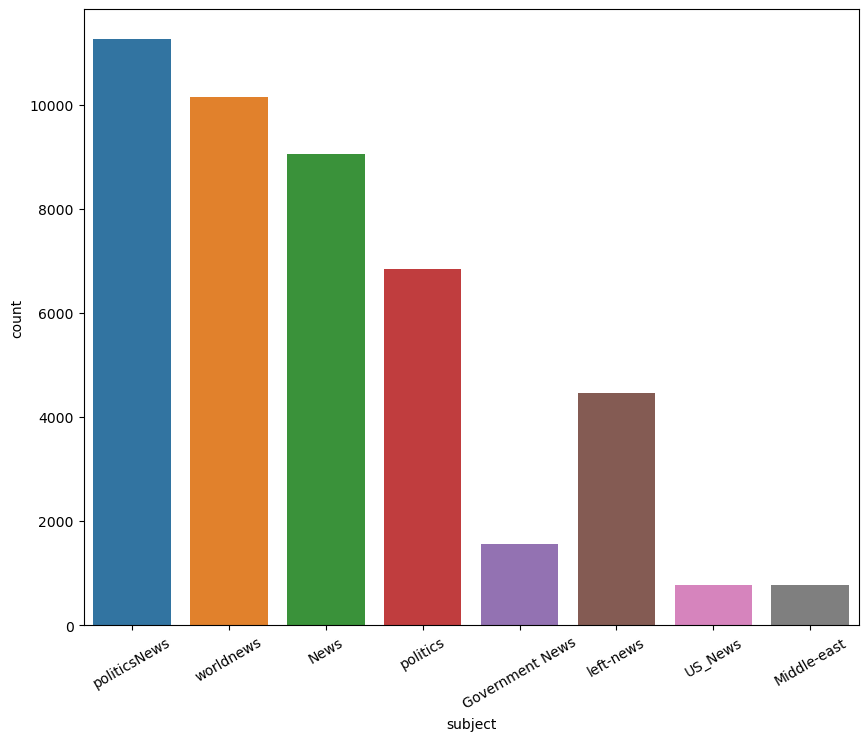

In [8]:
plt.figure(figsize=(10,8))
fig = sns.countplot(x='subject', data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
plt.show()

The `subject` column has 8 distinct values. The majority of the news belongs to the category `politicsNews` and `politics`, which can be interpreted as the same subject. Meanwhile, the number of news from the categories `Government News`, `left-news`, `US_News`, and `Middle-east` is quite low. As a result, the `subject` column is significantly imbalanced. We will investigate this further in the following plot.

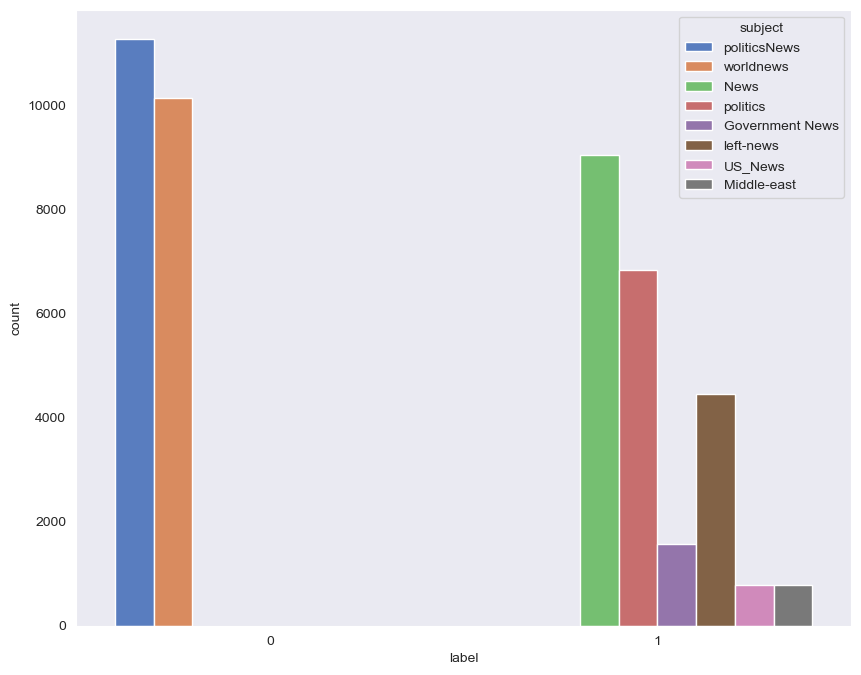

In [9]:
plt.figure(figsize = (10,8))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
#chart.set_xticklabels(chart.get_xticklabels())
plt.show()

This plot illustrates that all of the true news comes from only two subjects, `politicsNews` and `worldnews`. Incorporating the `subject` column in the machine learning models will greatly skew the training, as more emphasis will be placed on identifying real news within these specific subjects. So, let us keep the necessary columns and drop the rest.

In [10]:
data = data.drop(['subject', 'date'], axis=1)
data.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


For simplicity let us combine the 'title' and 'text' columns as one and call it 'all_text'.

In [11]:
data ['all_text'] = data['title'] + ' ' + data['text']

## Creating Word Cloud

A word cloud, also known as a tag cloud, is a visual representation of the most frequently used words in a text or dataset. The words are typically displayed in different font sizes, with the most frequently used words being displayed in the largest font size. Word clouds are often used to quickly identify the most important or prevalent themes in a dataset, and can be an effective way to visually summarize large amounts of text data. 

Stop words are a set of commonly used words in a language that are often ignored by search engines and natural language processing (NLP) algorithms. These words are generally considered to be of little value in text analysis because they do not convey much meaning on their own, and are often considered to be "noise" in the data. Examples of stop words in English include "a", "an", "the", "and", "but", "or", "because", "as", "of", and "in".

Now, we will generate a word cloud to examine the most recurrent words in our data, with the removal of stop words.

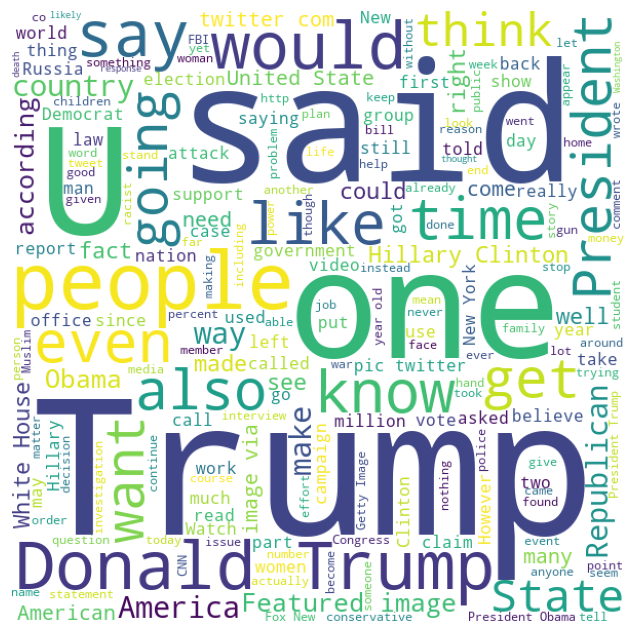

In [12]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=600, stopwords=stopwords.words('english'), background_color='white',
                        min_font_size=6).generate(' '.join(data[data['label'] == 1].text))

# plot the word cloud for fake news data
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

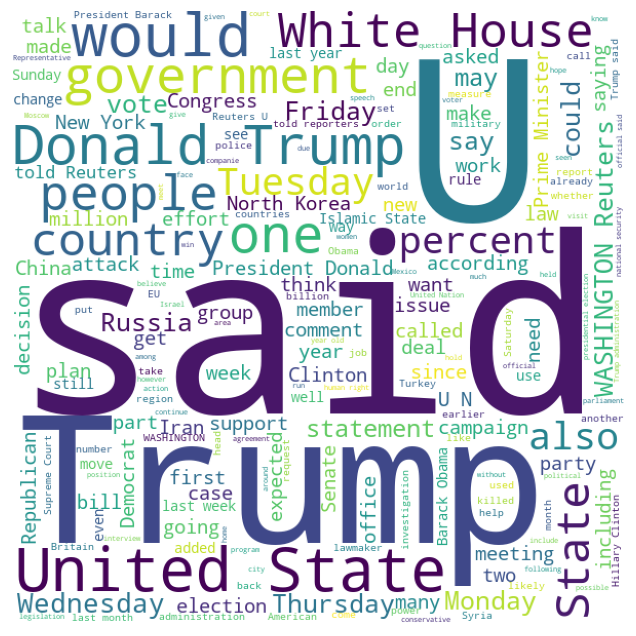

In [13]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=600, stopwords=stopwords.words('english'), background_color='white',
                        min_font_size=6).generate(' '.join(data[data['label'] == 0].text))

# plot the word cloud for real news data
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Model Selection and Training

We have a binary classification task at hand. We will experiment with different models and evaluate their performance. As classification is a supervised learning method, we first need to divide the data into training and testing sets. We will train the model using the training data, and evaluate its performance using the test data. Typically, the data is split such that 80% is used for training and 20% is used for testing. This is because a larger training set allows the model to learn more from the data.

In [36]:
# splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['all_text'], data['label'], test_size=0.2)

### Text Data Preprocessing

We cannot provide the text directly to the classifier, instead, we need to convert it into numerical values. Machine learning uses a basic model known as the bag-of-words approach to handle text data. The idea is to identify all the distinct words in the document, and create a vector of size equal to the number of unique words. Each word is assigned an index in the vector. The index corresponding to the word is filled with the frequency of that word in the document. However, this approach has a main drawback as it neglects all information related to the arrangement of the words and only takes into account the frequency of the words. To perform this transformation, we are utilizing `CountVectorizer` and `TfidfTransformer`.

#### CountVectorizer
`CountVectorizer` is used to convert a collection of text documents into a numerical representation, typically a sparse matrix. It tokenizes the text and builds a vocabulary of the words using the text. The vocabulary is then used to create the sparse matrix representation of the text, with the entries in the matrix being the count of the number of occurrences of the word in the document. `CountVectorizer` is a simple and effective feature extraction method for text data, it is easy to implement and works well for many text classification and NLP tasks, however, it does not consider the context of the words, and it can be affected by the presence of stop words. It is possible to remove stop words while vectorizing the text data using `CountVectorizer` method from the `sklearn` library.

#### TfidfTransformer
`TfidfTransformer` is used to convert the sparse matrix created by `CountVectorizer` into a normalized term-frequency inverse-document-frequency (`tf-idf`) representation. The `tf-idf` representation is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. The `tf-idf` value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the entire corpus.

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer


#Define the column transformer for CountVectorizer
preprocessor = ColumnTransformer(transformers=[
                                    ('tfidf', TfidfVectorizer(stop_words='english'), 'all_text')
                                ])      

`TfidfVectorizer` combines both CountVectorizer and TfidfTransformer into a single class, which can be used to vectorize a collection of raw documents to a matrix of TF-IDF features.  

### Machine Learning Models

Initially, we will provide a brief overview of all the models that we will be utilizing.

#### Multinomial Naive Bayes

`Multinomial Naive Bayes` is a probabilistic classification algorithm that is commonly used for text classification and natural language processing (NLP) tasks. It is based on the Bayes theorem, which states that the probability of a hypothesis ($H$) given some observed data ($D$) is equal to the probability of the data given the hypothesis, multiplied by the prior probability of the hypothesis.

$$ P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)} $$

The "naive" part of the algorithm comes from the assumption that the features (words in the text) are conditionally independent given the class label. This is a strong assumption, but it allows the algorithm to be computationally efficient and easy to implement. The "multinomial" part of the algorithm refers to the fact that it can handle discrete data, such as word counts, which is common in text classification.

The algorithm first calculates the probability of each class in the data, based on the frequency of the class in the training set. Then, for each feature in the test data, it calculates the conditional probability of that feature given each class, and uses these probabilities to estimate the likelihood of the feature belonging to each class. Finally, it uses the `Bayes theorem` to calculate the posterior probability of each class for the test data, and assigns the test data to the class with the highest probability.

#### Support Vector Machine

`Support Vector Machine (SVM)` is a type of supervised learning algorithm that can be used for classification and regression tasks. The basic idea behind SVM is to find the best boundary, or "hyperplane", that separates different classes in the data. The best boundary is one that maximizes the margin, or the distance between the boundary and the closest data points from each class. These closest data points are called "support vectors" and they determine the position of the boundary.

In classification tasks, `SVM` finds the boundary that separates the different classes by maximizing the margin. In other words, `SVM` finds a boundary that separates the data into different classes with the widest possible gap between them. This makes the model more robust to noise and reduces the chance of overfitting.

`SVMs` are particularly useful in cases where the data is not linearly separable, as the algorithm uses a technique called the kernel trick to transform the data into a higher dimensional space where it can be linearly separated. This allows `SVMs` to model non-linear decision boundaries.

### Machine Learning Pipeline

A `pipeline` is a sequence of data processing steps, where each step is a combination of a transformer and an estimator. In machine learning, a `pipeline` is used to automate the process of building, evaluating, and deploying models.

A `pipeline` is a convenient way to organize the process of training and evaluating a machine learning model, as it allows multiple steps to be executed in a single line of code. The `pipeline` takes care of the data preprocessing, feature extraction, model selection and evaluation, making it a great way to simplify the machine learning workflow.

In our example, a `pipeline` will include steps such as tokenizing text data, removing stopwords, vectorizing the text data, applying a normalization technique, and training a machine learning model. The `pipeline` can be fit on training data, and used to make predictions on unseen data.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

#Multinomial Naive Bayes
MNB_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
]) 

MNB_model = MNB_clf.fit(X_train, y_train)
MNB_prediction = MNB_model.predict(X_test)

#SVM Classification
SVM_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LinearSVC())
]) 

SVM_model = SVM_clf.fit(X_train, y_train)
SVM_prediction = SVM_model.predict(X_test)

## Metrics

In order to evaluate the performance of a model, we utilize two key metrics: `accuracy` and `confusion matrix`. 

- **Accuracy**: Accuracy is calculated by dividing the number of correct predictions by the total number of predictions. However, this metric is only considered reliable when the data is balanced. 

- **Confusion Matrix**: A confusion matrix provides a deeper understanding of the model by comparing predicted and actual values. We use four measures to evaluate performance: 
    * *True positives*: correctly predicted positive cases, 
    * *True negatives*: correctly predicted negative cases, 
    * *False positives*: incorrectly predicted positive cases, 
    * *False negatives*: incorrectly predicted negative cases.

In [42]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

accuracy:   93.831 %


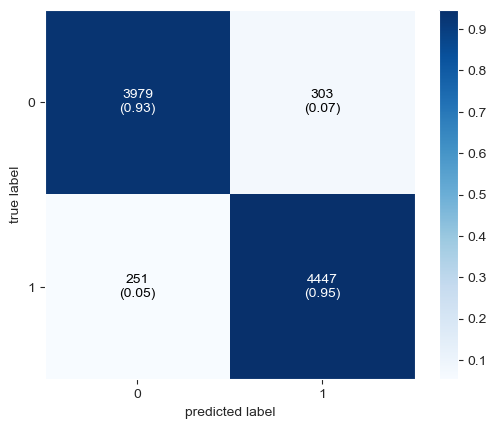

In [43]:
MNB_score = metrics.accuracy_score(y_test, MNB_prediction)
print("accuracy:   %0.3f %%" % (MNB_score*100))
cm = metrics.confusion_matrix(y_test, MNB_prediction, labels=[0,1])

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, MNB_prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   99.432 %


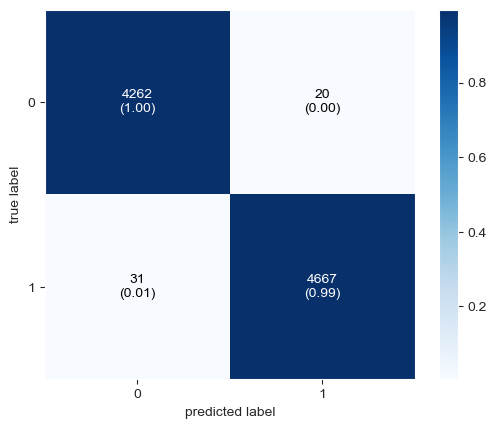

In [44]:
SVM_score = metrics.accuracy_score(y_test, SVM_prediction)
print("accuracy:   %0.3f %%" % (SVM_score*100))
#cm = metrics.confusion_matrix(y_test, SVM_prediction, labels=[0,1])

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, SVM_prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Conclusion

The results indicate that the performance of the `multinomial naive bayes` model is inferior when compared to `support vector machine`. There can be a few reasons why a `multinomial naive bayes` model may perform worse than a `support vector machine` model for *fake news classification*:

1. **Complexity of the data**: Fake news detection is a complex task and requires understanding of the context of the news. `SVM`, being a more complex model, may be better suited to handle such complexity.

2. **Features representation**: `Naive Bayes` models are based on discrete probability distributions, while `SVM` models can model a much larger number of features and can handle continuous values, which may be more suitable for natural language processing tasks.

3. **Assumptions**: A `Naive Bayes` model makes strong independence assumptions between the features, while an `SVM` model makes fewer assumptions about the underlying data distribution. In the case of fake news classification, where the text data is complex, the independence assumptions of `Naive Bayes` model may not hold.

4. **Regularization**: `SVM` model uses regularization to avoid overfitting and it allows the model to generalize better. `Naive bayes` model doesn't use regularization.